<a href="https://colab.research.google.com/github/PsAkash10/PortfolioProjects/blob/main/Russia_vs_Ukraine_War_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [2]:
from google.colab import files
files.upload()


Saving filename.csv to filename.csv


{'filename.csv': b'id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest\r\n1628918711750131713,1628844700026249217,2023-02-24 00:44:19 UTC,2023-02-24,00:44:19,+0000,1388466880437002242,ashokkumarhmaj4,Ashokkumar H Majmudar,,"@POTUS If we stayed strong, why Ukrainevlost so much land to Russia???",en,[],[],[],0,0,0,[],[],https://twitter.com/AshokkumarHMaj4/status/1628918711750131713,False,,0,,,,,,,,"[{\'screen_name\': \'POTUS\', \'name\': \'President Biden\', \'id\': \'1349149096909668363\'}]",,,,\r\n1628918711590715392,1628801864774090752,2023-02-24 00:44:19 UTC,2023-02-24,00:44:19,+0000,1274243122239684608,some1hasspoken,Some1\xef\xb8\x8f\xe2\x83\xa3,,@mfa_russia The west has already disrupted our media and brainwashed everyone into 

In [3]:
data = pd.read_csv("filename.csv")
print(data.head())

                    id      conversation_id               created_at  \
0  1628918711750131713  1628844700026249217  2023-02-24 00:44:19 UTC   
1  1628918711590715392  1628801864774090752  2023-02-24 00:44:19 UTC   
2  1628918705324457985  1628918379666108416  2023-02-24 00:44:17 UTC   
3  1628918704452042758  1628818240674873345  2023-02-24 00:44:17 UTC   
4  1628918701524242432  1628869883751546880  2023-02-24 00:44:16 UTC   

         date      time  timezone              user_id         username  \
0  2023-02-24  00:44:19         0  1388466880437002242  ashokkumarhmaj4   
1  2023-02-24  00:44:19         0  1274243122239684608   some1hasspoken   
2  2023-02-24  00:44:17         0  1493318257083772928        curthoser   
3  2023-02-24  00:44:17         0   760604011653271552          pjrosa3   
4  2023-02-24  00:44:16         0           2520560969     angiefalangi   

                    name place  ... geo source user_rt_id user_rt retweet_id  \
0  Ashokkumar H Majmudar   NaN  ... 

In [4]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [5]:
data = data[["username", "tweet", "language"]]

In [6]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [7]:
data["language"].value_counts()

en     8289
pt     1050
it      242
qme      81
in       54
und      54
ja       42
es       30
ca       24
ru       19
nl       14
qht      14
de       13
fr       12
pl       10
qam       8
fi        6
tl        5
ro        5
zxx       5
et        4
cs        4
uk        3
vi        3
ko        3
zh        2
el        2
hi        2
da        2
th        2
ar        2
tr        2
sl        1
no        1
qst       1
cy        1
ur        1
bn        1
Name: language, dtype: int64

In [8]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


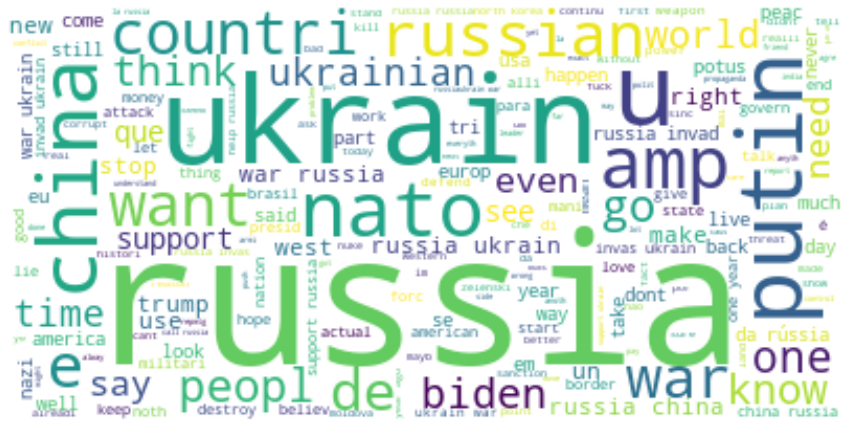

In [9]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                               tweet  Positive  Negative  \
0    potus stay strong ukrainevlost much land russia     0.355     0.000   
1  mfarussia west alreadi disrupt media brainwash...     0.231     0.000   
2                  ap russia cant build like destroy     0.318     0.235   
3  statedept potus nato rememb biden said sanctio...     0.000     0.163   
4  ennabloom far mani live stolen ukrain defeat r...     0.184     0.193   

   Neutral  
0    0.645  
1    0.769  
2    0.446  
3    0.837  
4    0.623  


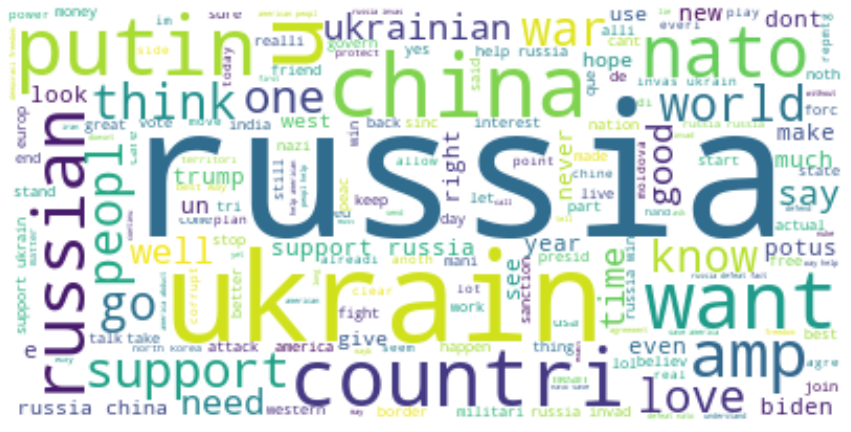

In [11]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

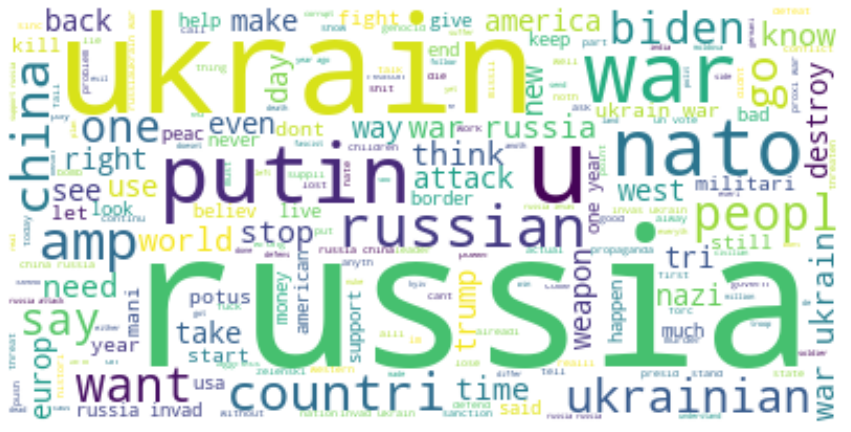

In [12]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()